In [1]:
import zipfile
import pandas as pd

zip_path = r"C:\Users\Qamar\Downloads\creditcard.csv.zip"  # your zip file path
extract_folder = r"C:\Users\Qamar\Downloads"  # folder to extract to

# Step 1: Extract the CSV file from the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Step 2: Load the extracted CSV file
csv_path = extract_folder + r"\creditcard.csv"  # extracted csv file path

df = pd.read_csv(csv_path)

print(df.head())  # check data loaded properly


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

c:\Users\Qamar\miniconda3\envs\ml_project\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9414 - loss: 0.3293
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9981 - loss: 0.0223
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0078
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9990 - loss: 0.0058
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9992 - loss: 0.0050
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 0.0040
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9994 - loss: 0.0034
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 0.0037
Epoch 9/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 0.0036
Epoch 10/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9994 - loss: 0.0032
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
TRAIN RESULTS:
Accuracy: 0.9994426035243258
Precision

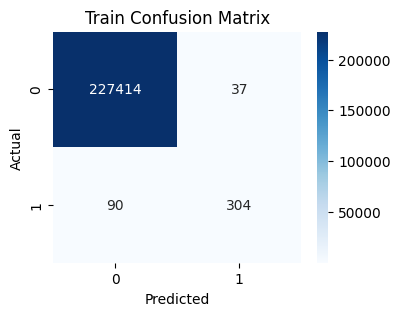

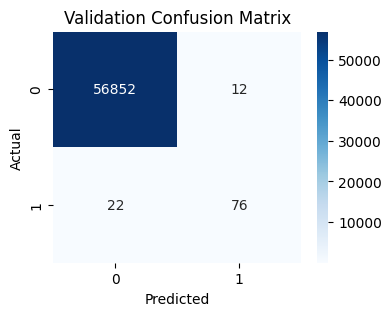

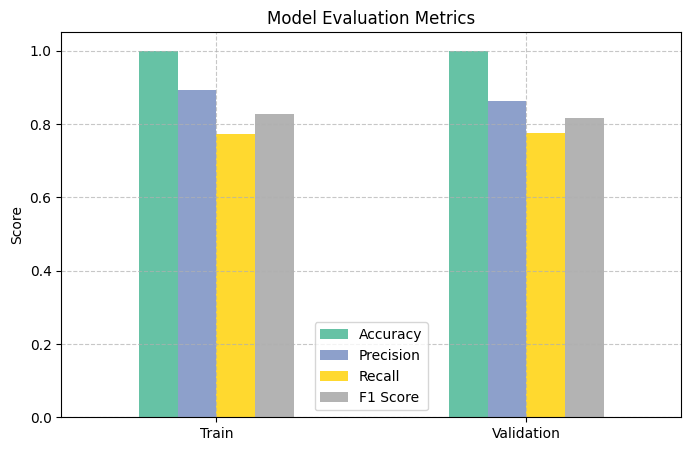

C:\Users\Qamar\AppData\Local\Temp\ipykernel_8756\857167631.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_val_pred.flatten(), palette="pastel")


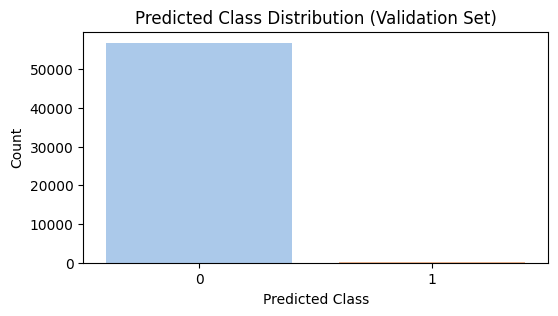

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset

# Separate features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Build ANN model
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=2048, verbose=1)

# Predict
y_train_pred = (model.predict(X_train_scaled) > 0.5).astype("int32")
y_val_pred = (model.predict(X_val_scaled) > 0.5).astype("int32")

# Evaluation
print("TRAIN RESULTS:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))

print("\nVALIDATION RESULTS:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))

# Count actual and correctly predicted 1s
print("\nTRAIN SET: Actual 1s =", sum(y_train), " | Correctly Predicted 1s =", np.sum((y_train.values == 1) & (y_train_pred.flatten() == 1)))
print("VALIDATION SET: Actual 1s =", sum(y_val), " | Correctly Predicted 1s =", np.sum((y_val.values == 1) & (y_val_pred.flatten() == 1)))

# Confusion Matrices
train_cm = confusion_matrix(y_train, y_train_pred)
val_cm = confusion_matrix(y_val, y_val_pred)

def plot_conf_matrix(cm, title):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(train_cm, "Train Confusion Matrix")
plot_conf_matrix(val_cm, "Validation Confusion Matrix")

# Metrics Bar Plot
train_metrics = {
    "Accuracy": accuracy_score(y_train, y_train_pred),
    "Precision": precision_score(y_train, y_train_pred),
    "Recall": recall_score(y_train, y_train_pred),
    "F1 Score": f1_score(y_train, y_train_pred)
}
val_metrics = {
    "Accuracy": accuracy_score(y_val, y_val_pred),
    "Precision": precision_score(y_val, y_val_pred),
    "Recall": recall_score(y_val, y_val_pred),
    "F1 Score": f1_score(y_val, y_val_pred)
}

df_metrics = pd.DataFrame([train_metrics, val_metrics], index=["Train", "Validation"])
df_metrics.plot(kind="bar", figsize=(8, 5), colormap="Set2")
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Prediction Distribution on Validation
plt.figure(figsize=(6, 3))
sns.countplot(x=y_val_pred.flatten(), palette="pastel")
plt.title("Predicted Class Distribution (Validation Set)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.show()
